# EDA on CA EnviroScan 4

4/8/22

David Tersegno

---

This is a general scan over the data included in the California Office of Environmental Health Hazard Assessment [EnviroScan 4.0 report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), released in 2021.

The data is accompanied by a [data dictionary](../enviroscreen_info/CAES4/calenviroscreen40resultsdatadictionary_F_2021.pdf) with explanations for each of the columns. This data dictionary is also a sheet in the Excel data file.

The data file includes a third sheet with demographic information for each region.

Giovanna [ ] and Marshall Cyrus are each looking over the CA EnviroScans 2 and 3. These came as CSV files, without the extra sheets included in the Excel file.

# Import libraries

In [45]:
# general
import os
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature

# sklearn

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [24]:
plt.style.use('dark_background')
plt.style.use('tableau-colorblind10')

# Import data

In [17]:
# list raw data files
data_folder = '../raw_data/'
raw_data_files = os.listdir(data_folder)
raw_data_files

['calenviroscreen-3.0-results-june-2018-update.csv',
 'calenviroscreen2-final-report.csv',
 'calenviroscreen40resultsdatadictionary_F_2021.xlsx']

In [18]:
#import the enviroscan 4 excel data
ca4_file_path = data_folder + raw_data_files[2]
dfca4 = pd.read_excel(ca4_file_path)

In [19]:
#The data takes a few seconds to read, but is only a few MB after being interpreted.
# consider saving a csv copy from the dataframe later.

In [20]:
#look at the top.
dfca4.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),...,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),...,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),...,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),...,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),...,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571


### Column list

In [21]:
dfca4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

The data includes 58 columns, mostly as numerical types.
The three that aren't numerical include locations `California County` and `Approximate Location`. The third `object` type is `CES 4.0 Percentile Range`. This gives a range of numbers that likely can be turned into a numerical. We'll deal with that as it comes.

---
---
# Column Detail

---
## 0 Census Tract

In [25]:
col = 'Census Tract'
dfca4[col].describe()

count    8.035000e+03
mean     6.054896e+09
std      2.652280e+07
min      6.001400e+09
25%      6.037265e+09
50%      6.059053e+09
75%      6.073016e+09
max      6.115041e+09
Name: Census Tract, dtype: float64

Text(0.5, 1.0, 'Census Tract histogram')

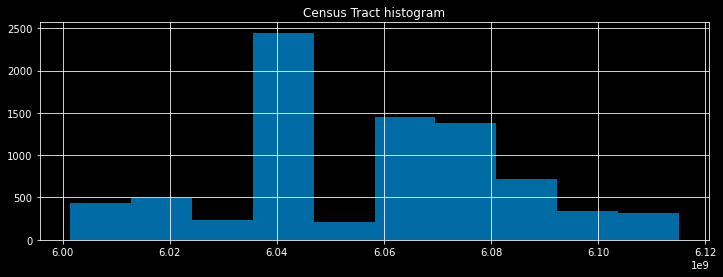

In [26]:
dfca4[col].hist( figsize = (12,4))
plt.title(col + ' histogram')

In [27]:
len(dfca4)

8035

In [28]:
len(dfca4[col].unique())

8035

The number of unique values is the same as the number of observations. Each has its own unique census identifier --- these may be used as indices for the data, but I will wait to see if there's any pattern.

### Q:
    - Do these census regions cover every portion of California?
    - How are they chosen? Are they approximately population organized?
    - Are these regions the same set as those in the other CAES data sets? Were there any changes to them from year to year?

---
##  1   Total Population 

Thanks to [the docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) for help with series.hist(). The `log` parameter is passed to `matplotlib.pyplot.hist()`.

In [32]:
col = 'Total Population'
dfca4[col].describe()

count     8035.000000
mean      4889.047542
std       2269.284396
min          0.000000
25%       3470.000000
50%       4615.000000
75%       5931.000000
max      38754.000000
Name: Total Population, dtype: float64

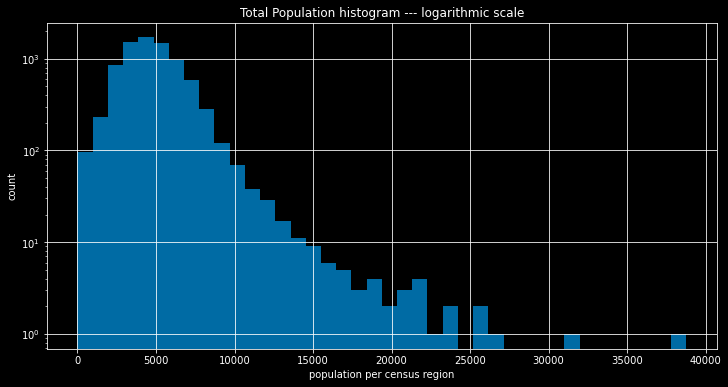

In [33]:
#distribution
dfca4[col].hist(bins=40, log = True, figsize = (12,6));
plt.title(col + ' histogram --- logarithmic scale');
plt.xlabel("population per census region");
plt.ylabel('count');

The population is skewed to higher values, with thousands of small populated areas and only a handful of very heavily populated ones.

None of these populations are "big city" levels, though. The very largest and sprawling areas must be broken into neighborhoods.

### Q:
    - What are the populations measuring? The census number may be a specifically designated region.

## 2 - California County

In [34]:
col = 'California County'
dfca4[col].describe()

count            8035
unique             58
top       Los Angeles
freq             2343
Name: California County, dtype: object

It looks like over a quarter of these regions come from Los Angeles county. It's a big one. There are 58 unique counties.

### Q:
    - is every portion of california's land represented here?
    - is every county represented?
    

## 3   ZIP 

In [35]:
col = 'ZIP'
dfca4[col].describe()

count     8035.000000
mean     92836.574611
std       3445.177594
min         32.000000
25%      91602.000000
50%      92691.000000
75%      94558.000000
max      96161.000000
Name: ZIP, dtype: float64

In [36]:
len(dfca4[col].unique())

1355

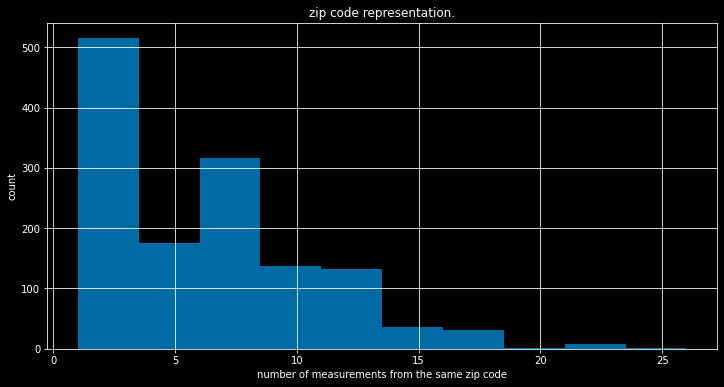

In [37]:
dfca4[col].value_counts().hist(figsize = (12,6))
plt.xlabel("number of measurements from the same zip code")
plt.ylabel("count")
plt.title("zip code representation.");

These are zip codes. There are definitely multiple measurements per zip code --- only 1355 unique values. There is one for each region, but at least one is surely wrong... there is a 32. Is this is something like 00032?

In [38]:
dfca4.loc[dfca4[col] < 10000]

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
4544,6083001800,1050,Santa Barbara,32,Unincorporated Santa Barbara County area,-119.717740,34.777648,22.281902,42.713061,40-45%,...,86.899445,38.5,66.871859,9.3,83.224883,10.6,16.311787,39.005295,4.046117,33.862834
5057,6093001200,1261,Siskiyou,35,Unincorporated Siskiyou County area,-121.826057,41.411603,19.513579,36.245587,35-40%,...,NaN,36.0,63.241206,13.7,95.288912,10.9,17.934094,62.053356,6.436950,68.772063
5143,6033000100,3376,Lake,48,Unincorporated Lake County area,-122.909601,39.335491,18.998409,35.161372,35-40%,...,13.303559,38.5,66.871859,13.1,94.521083,16.7,47.617237,48.453698,5.026223,48.020676
5833,6105000400,894,Trinity,39,Unincorporated Trinity County area,-123.210947,40.069602,15.397582,26.462431,25-30%,...,12.275003,60.3,91.846734,NaN,NaN,37.5,97.629911,55.341376,5.740699,58.295512
6343,6109004200,3487,Tuolumne,40,Unincorporated Tuolumne County area,-119.640723,37.949499,12.828329,20.032779,20-25%,...,0.000000,29.0,52.261307,4.6,39.211348,9.7,12.788340,40.278108,4.178149,35.816944
6579,6017030603,3668,El Dorado,51,Unincorporated El Dorado County area,-120.422095,38.882147,11.697855,17.057489,15-20%,...,0.000000,26.9,48.442211,5.3,48.256117,17.9,53.624842,33.353853,3.459879,24.873928
8025,6083980100,10,Santa Barbara,57,Unincorporated Santa Barbara County area,-120.048221,33.948186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8034,6111980000,118,Ventura,61,Unincorporated Ventura County area,-119.503588,33.255655,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8 entries with goofball zips.

These are all "unincorporated" areas. It looks like these are common:

[LACounty.gov Unincorporated Areas](https://lacounty.gov/government/about-la-county/unincorporated-areas/)

[PolicyLink California Unincorporated: Mapping Disadvantaged Communities in the San Joaquin Valley(PDF report)](https://www.policylink.org/sites/default/files/CA%20UNINCORPORATED_FINAL.pdf)

[ZocaloPublicSquare](https://www.zocalopublicsquare.org/2020/11/10/california-unincorporated-communities-covid19-pandemic/ideas/connecting-california/)

## Q:
    - are these unincorporated "zips" real values that are used by the state? Do they mean anything?
    - How many times are certain zip codes represented?
    - Are there other "unincorporated areas"?
    

## 4    Approximate Location     

In [39]:
col = 'Approximate Location'
dfca4[col].describe()

count            8035
unique            785
top       Los Angeles
freq              996
Name: Approximate Location, dtype: object

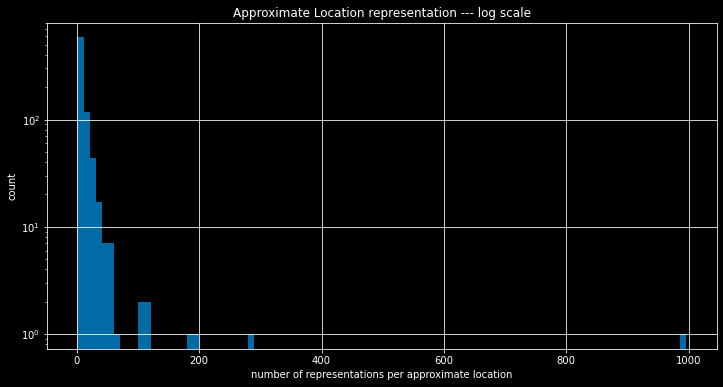

In [40]:
dfca4[col].value_counts().hist(bins = 100, log = True, figsize = (12,6))
plt.xlabel("number of representations per approximate location")
plt.title("Approximate Location representation --- log scale");
plt.ylabel('count');

A lot from LA again. That's the lone 900+. No NaNs. This is basically a "city" stand-in, which accounts for all the places that aren't really cities. The data dictionary stresses that this is for "reference purposes only." What is a reference purpose?

## Q:
    - 

## 5 Latitude and 6 Longitude
There shouldn't be too many surprises here. Check for nans and goofballs. Perhaps an opportunity to practice with [matplotlib](https://matplotlib.org/basemap/users/examples.html).

The data dictionary gives each of these as a latitude and longitude of the _centroid_ of the tract. For disconnected and concave shapes, it is possible for this centroid to lie outside of the border.

In [41]:
dfca4['Latitude'].describe()

count    8035.000000
mean       35.495893
std         2.086016
min        32.547376
25%        33.924145
50%        34.206624
75%        37.634021
max        41.946648
Name: Latitude, dtype: float64

In [42]:
dfca4['Longitude'].describe()

count    8035.000000
mean     -119.409318
std         1.976336
min      -124.297889
25%      -121.518410
50%      -118.429194
75%      -117.924814
max      -114.306484
Name: Longitude, dtype: float64

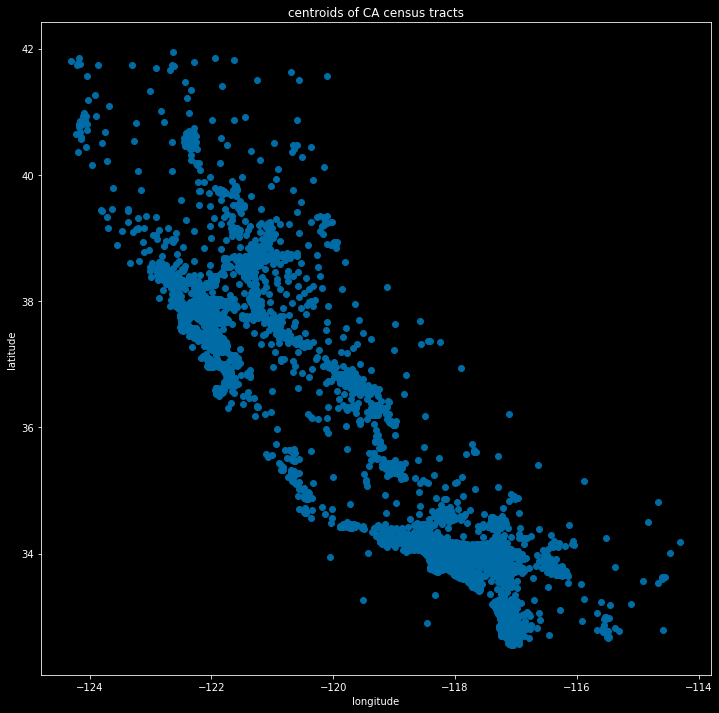

In [54]:
lat = dfca4['Latitude']
lon = dfca4['Longitude']
#plot these bad boys
plt.figure(figsize = (12,12))
plt.scatter(lon, lat)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('centroids of CA census tracts');

Hey! That's California. It even looks like an elevation / population map, with measurements largely avoiding mountainous areas. I'm sure this is primarily a reflection of the distribution of 2010 census areas.

## plotting census tracts

Shapefiles for the California census tracts, defined in 2010, were obtained from [catalog.data.gov](https://catalog.data.gov/dataset/tiger-line-shapefile-2019-state-california-current-census-tract-state-based). The site has this to say about the tracts and their codes:
> Census tracts are small, relatively permanent statistical subdivisions of a county or equivalent entity, and were defined by local participants as part of the 2010 Census Participant Statistical Areas Program. The Census Bureau delineated the census tracts in situations where no local participant existed or where all the potential participants declined to participate. The primary purpose of census tracts is to provide a stable set of geographic units for the presentation of census data and comparison back to previous decennial censuses. Census tracts generally have a population size between 1,200 and 8,000 people, with an optimum size of 4,000 people. When first delineated, census tracts were designed to be homogeneous with respect to population characteristics, economic status, and living conditions. The spatial size of census tracts varies widely depending on the density of settlement. Physical changes in street patterns caused by highway construction, new development, and so forth, may require boundary revisions. In addition, census tracts occasionally are split due to population growth, or combined as a result of substantial population decline. Census tract boundaries generally follow visible and identifiable features. They may follow legal boundaries such as minor civil division (MCD) or incorporated place boundaries in some States and situations to allow for census tract-to-governmental unit relationships where the governmental boundaries tend to remain unchanged between censuses. State and county boundaries always are census tract boundaries in the standard census geographic hierarchy. In a few rare instances, a census tract may consist of noncontiguous areas. These noncontiguous areas may occur where the census tracts are coextensive with all or parts of legal entities that are themselves noncontiguous. For the 2010 Census, the census tract code range of 9400 through 9499 was enforced for census tracts that include a majority American Indian population according to Census 2000 data and/or their area was primarily covered by federally recognized American Indian reservations and/or off-reservation trust lands; the code range 9800 through 9899 was enforced for those census tracts that contained little or no population and represented a relatively large special land use area such as a National Park, military installation, or a business/industrial park; and the code range 9900 through 9998 was enforced for those census tracts that contained only water area, no land area.



Some highlights:
- tract demographics:
    - chosen for population size of 1,200 -- 8,000 people
    - designed to be homogeneous wrt population characteristics, economic status, and living conditions
- rare tracts are noncontiguous
- some code ranges are reserved for certain kinds of region.

| code range | reserved for |
|---|---|
| 9400 -- 9499 | federally recognized American Indian reservations, off-reservation trust lands, or tracts with majority American Indian population |
| 9800 -- 9899 | tracts that contained little or no population and represented a relatively large special land use area such as a National Park, military installation, or a business/industrial park |
| 9900 -- 9998 | 9900 through 9998 was enforced for those census tracts that contained only water area, no land area |

In [47]:
#get census border feature
census_borders_filepath = '../border_shapefiles/tl_2019_06_tract.shp'
census_borders = cfeature.ShapelyFeature(Reader(census_borders_filepath).geometries(), ccrs.PlateCarree(), edgecolor = 'white')


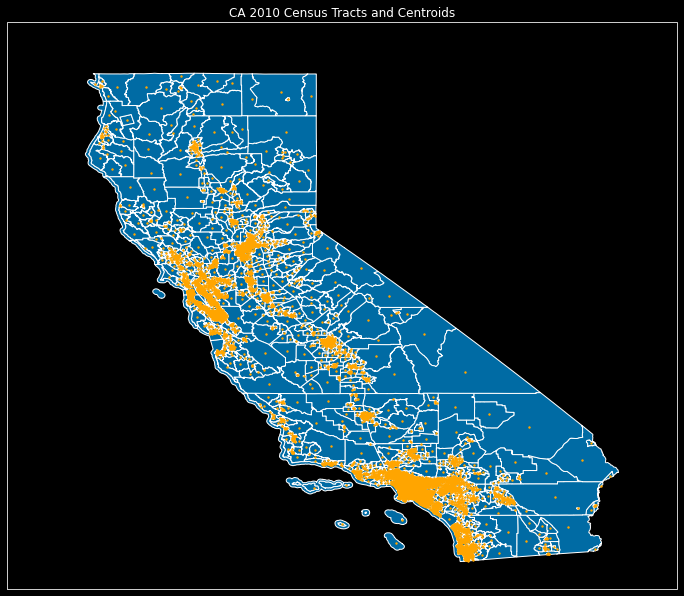

In [70]:
#give lats/lons enclosing beautiful california
west_edge = -126 #left
east_edge = -113 #right

north_edge = 43 #top
south_edge = 32 #bottom

#plot the census tracts
plt.figure(figsize = (12,12))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(census_borders, zorder = 0);

#plot the tract centroids
plt.scatter(lon,lat, zorder=1, c = 'orange', s = 2, marker='o')

#add labels
plt.title("CA 2010 Census Tracts and Centroids")

#set boundaries and show
plt.xlim(west_edge,east_edge)
plt.ylim(south_edge, north_edge)
plt.show();

In [83]:
#make a function to plot census tracts and centroids within a certain region.

def plot_tracts(lat_lims = [32,43], lon_lims = [-126,-113], plot_centroids = True, plot_title = 'CA 2010 Census Tracts'): 
    west_lim,  east_lim  = lon_lims
    south_lim, north_lim = lat_lims
    #plot the census tracts
    plt.figure(figsize = (12,12))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.add_feature(census_borders, zorder = 0);

    #plot the tract centroids
    plt.scatter(lon,lat, zorder=1, c = 'orange', s = 2, marker='o')

    #add labels
    plt.title(plot_title)

    #set boundaries and show
    plt.xlim(west_lim, east_lim)
    plt.ylim(south_lim, north_lim)
    plt.show();

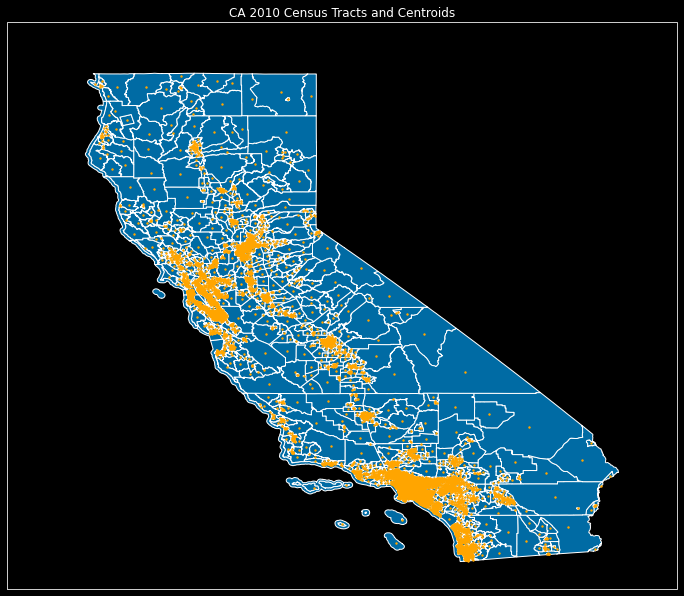

In [81]:
plot_tracts()

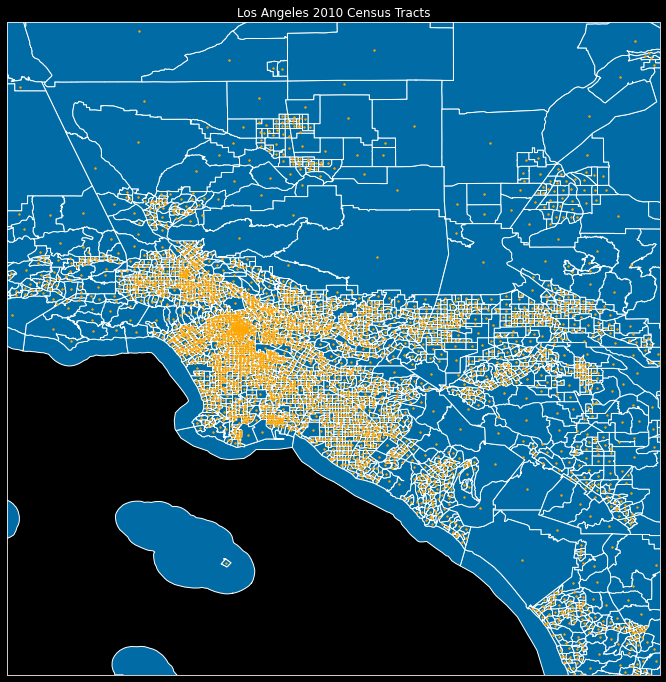

In [90]:
plot_tracts(
    lat_lims = [33,35],
    lon_lims = [-119, -117],
    plot_title = 'Los Angeles 2010 Census Tracts'
           )

Comparing the borders:
It looks like the shape file includes boundaries around census areas extending into the ocean. 

Comparing this to shapes seen in [Google Maps](https://www.google.com/maps/@33.7376071,-118.2114839,166819m/data=!3m1!1e3?hl=en):

![satellite-CA-Google](pix/sacagoogle.png)

These regions extend into the sea, but can also include mountainous and unpopulated areas on the coast. Look at the region on Catalina island outside of the tiny tract for the town of Avalon.

## 7   CES 4.0 Score  

Data dictionary says 
> CalEnviroScreen Score, Pollution Score multiplied by Population Characteristics Score

This is some kind of CES 

In [91]:
col = "CES 4.0 Score"
dfca4[col].describe()

count    7932.000000
mean       28.324179
std        16.512069
min         1.033954
25%        14.786524
50%        25.553719
75%        40.057396
max        93.183570
Name: CES 4.0 Score, dtype: float64

A few NaNs. Find out what this value means.

[Column list](#Column-list)